# 07-1. 결측치 정제하기
- 결측치(missing value): 누락된 값, 비어 있는 값
    - 실제로 데이터를 분석할 때는 결측치가 있는지 확인해 제거하는 정제 과정을 거친 다음 분석해야 함
    
- np.nan: 결측치 만들기
- pd.isna(df): 결측치 확인하기
- df.dropna(subset = [cols]) / df.dropna()
- df.fillna(): 결측치 대체법(imputation)
- loc[[행들], [열들]]

### 결측치 만들기

In [1]:
# p.178
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'  : ['M', 'F', np.nan, 'M', 'F'],
                   'score': [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
# p.179 - 1
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

### 결측치 확인하기

In [3]:
# p.179 - 2
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
# p.180 - 1
pd.isna(df).sum()

sex      1
score    1
dtype: int64

### 결측치 제거하기

In [5]:
# p.180 - 2
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
# p.180 - 3
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

### 여러 변수에 결측치 없는 데이터 추출하기

In [7]:
# p.181 - 1
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치가 하나라도 있으면 제거하기

In [9]:
# p.181 - 2
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치 제거하지 않고 분석하기
- groupby()와 agg()를 이용해 집단별 요약 통계량을 구할 때도 결측치를 제거하고 연산(연산 중 결측치가 있으면 자동으로 제거하고 연산)

In [10]:
# p.182 - 1
df['score'].mean()

4.0

In [11]:
# p.182 - 2
df['score'].sum()

16.0

In [14]:
# p.182 - 2
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                       sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### 평균값으로 결측치 대체하기

In [20]:
# p.183 - 1
exam = pd.read_csv('../data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [21]:
# p.184 - 1
exam['math'].mean()

55.23529411764706

In [22]:
# p.184 - 2
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [23]:
# p.184 - 3
exam['math'].isna().sum()

0

## 혼자서 해보기

In [46]:
mpg = pd.read_csv('../data/mpg.csv')
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan
mpg.loc[[64, 123, 130, 152, 211]] # hwy 부분 NaN 값 삽입

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,NaN,r,suv
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,NaN,p,suv
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,NaN,p,suv
211,volkswagen,gti,2.8,1999,6,manual(m5),f,17,NaN,r,compact


In [47]:
# p.185 - Q1
drv_nan = mpg.loc[:, 'drv'].isna().sum()
hwy_nan = mpg.loc[:, 'hwy'].isna().sum()

print(f'drv 변수의 결측치: {drv_nan}개, hwy 변수의 결측치: {hwy_nan}개')

drv 변수의 결측치: 0개, hwy 변수의 결측치: 5개


In [54]:
# p.185 - Q2
new_mpg = mpg.dropna(subset = ['hwy']) \
             .groupby('drv') \
             .agg(mean_hwy = ('hwy', 'mean'))
# 방법: hwy 결측치 제거 - drv별 분리 - hwy 평균 구하기
new_mpg

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [55]:
# 기타
new_mpg2 = mpg.groupby('drv') \
              .agg(mean_hwy = ('hwy', 'mean'))
new_mpg2

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


# 07-2. 이상치 정제하기
- 이상치(anomaly): 정상 범위에서 크게 벗어난 값
    - 실제로 데이터에는 대부분 이상치가 들어 있어서 이상치를 발견해서 결측치(missing value)로 바꿔 제거하고 분석하는 방법으로 해결

- 발견 방법
    - value_counts()를 이용해 빈도표를 만들어 확인 / sort_index() 활용

- 없애는법
    - np.where(기준, 기준이 참일 때, 기준이 거짓일 때)
    
- sns.boxplot(data, y)

### 이상치 제거하기 - 존재할 수 없는 값

In [56]:
# p.186 - 1
df = pd.DataFrame({'sex'  : [1, 2, 1, 3, 2, 1],
                   'score': [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


### 이상치 확인하기

In [61]:
# p.187 - 1
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [62]:
# p.187 - 2
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

### 결측 처리하기

In [63]:
# p.187 - 3
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [65]:
# p.188 - 1
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [67]:
# p.188 - 2
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [68]:
# p.189 - 1
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)

In [69]:
# p.189 - 2
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [70]:
# p.189 - 3
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [72]:
# p.189 - 4
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [73]:
# p.189 - 5
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [74]:
# p.189 - 6
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


## 이상치 제거하기 - 극단적인 값

### 상자 그림으로 극단치 기준 정하기

<Axes: ylabel='hwy'>

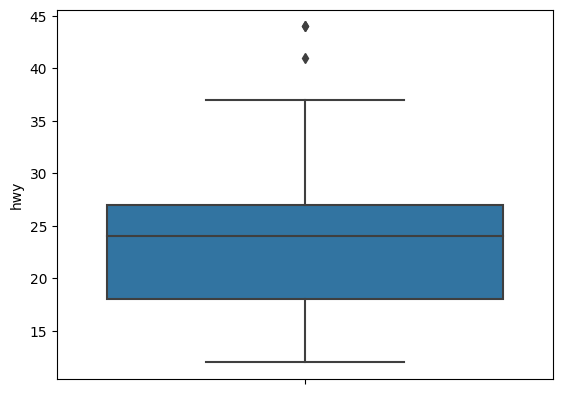

In [75]:
# p.191 - 1
mpg = pd.read_csv('../data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [76]:
# p.192 - 1
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [77]:
# p.192 - 2
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [78]:
# p.192 - 3
iqr = pct75 - pct25
iqr

9.0

In [80]:
# p.193 - 1
pct25 - 1.5 * iqr

4.5

In [81]:
# p.193 - 2
pct75 + 1.5 * iqr

40.5

In [82]:
# p.193 - 3
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [84]:
# p.193 - 4
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## 혼자서 해보기

In [135]:
mpg = pd.read_csv('../data/mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# ctv 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [136]:
# p.194. Q1
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [137]:
# p.194. Q1
mpg['drv'] = np.where(mpg['drv'].isin(['f', '4', 'r']), mpg['drv'], np.nan)

print(mpg['drv'].value_counts().sort_index())

drv
4    100
f    106
r     24
Name: count, dtype: int64


<Axes: ylabel='cty'>

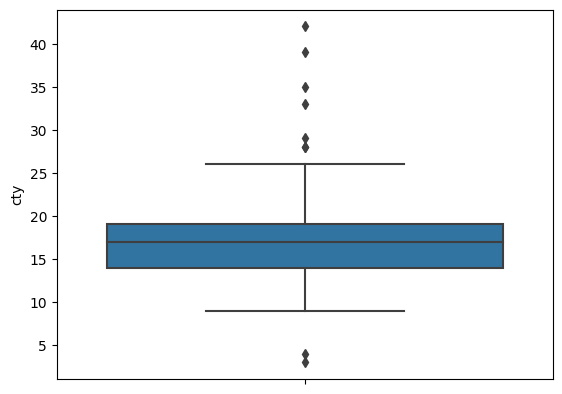

In [138]:
# p.194. Q2
sns.boxplot(data=mpg, y=mpg['cty'])

In [139]:
# p.194. Q2
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75 - pct25
print(pct25 - 1.5 * iqr, pct75 + 1.5 * iqr)

6.5 26.5


<Axes: ylabel='cty'>

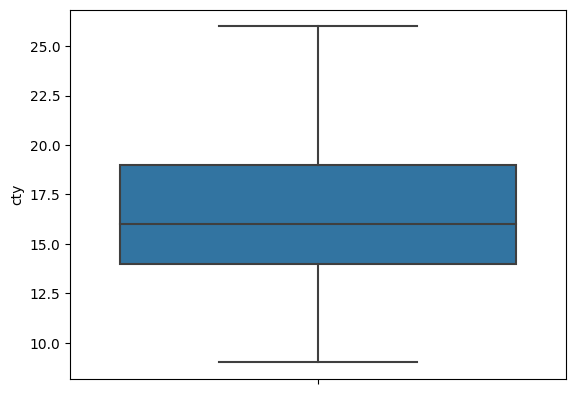

In [140]:
# p.194. Q2
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])
sns.boxplot(data=mpg, y=mpg['cty'])

In [141]:
# p.194. Q3
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
